In [48]:
import pandas as pd
df = pd.read_csv('구리 선물 과거 데이터2.csv', parse_dates=['날짜'], index_col="날짜")
df.head()

,종가,시가,고가,저가,거래량,변동 %
날짜,,,,,,
2025-04-01,5.0625,5.0510,5.0695,5.0503,0.01K,0.25%
2025-03-31,5.0500,5.1450,5.1635,5.0175,0.00K,-1.99%
2025-03-28,5.1525,5.1185,5.1860,5.0930,0.31K,0.64%
2025-03-27,5.1195,5.2405,5.2715,5.0890,65.70K,-2.36%
2025-03-26,5.2430,5.2275,5.3740,5.2220,88.50K,0.62%


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2620 entries, 2025-04-01 to 2015-03-03
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      2620 non-null   float64
 1   시가      2620 non-null   float64
 2   고가      2620 non-null   float64
 3   저가      2620 non-null   float64
 4   거래량     2539 non-null   object 
 5   변동 %    2620 non-null   object 
dtypes: float64(4), object(2)
memory usage: 143.3+ KB


In [50]:
!pip install arch

In [51]:
!sudo mkdir -p /usr/share/fonts/truetype/malgun
!sudo mv malgun.ttf /usr/share/fonts/truetype/malgun/
!fc-cache -f -v

mv: cannot stat 'malgun.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 4 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/malgun: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/malgun: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipp

In [53]:
from arch import arch_model
returns = df['종가'].pct_change().dropna()
model = arch_model(returns, mean='AR', lags=1, vol='GARCH', p=1, q=1) # 평균 수익률에 대한 예측과 함께 변동성 예측도 동시에 수행
model_fit = model.fit()
forecast = model_fit.forecast(start=len(returns), horizon=30)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 848670118.8895696
Iteration:      2,   Func. Count:     20,   Neg. LLF: 599975.1973924652
Iteration:      3,   Func. Count:     32,   Neg. LLF: -7589.294124179592
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7589.294125640428
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 3


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000183. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                     종가   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7589.29
Distribution:                  Normal   AIC:                          -15168.6
Method:            Maximum Likelihood   BIC:                          -15139.2
                                        No. Observations:                 2618
Date:                Tue, Apr 01 2025   Df Residuals:                     2616
Time:                        04:29:01   Df Model:                            2
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -2.0285e-04  2.585e-04     -0.785      0.433 [-7.096e-04,3.039e-04]
종가[1]          -0.0266  2.143e-02     -1.243      0.214 [-6.864e-02,1.538e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.8305e-05  3.058e-12  5.986e+06      0.000 [1.830e-05,1.831e-05]
alpha[1]       0.0500  1.107e-02      4.515  6.324e-06 [2.830e-02,7.170e-02]
beta[1]        0.8500  1.039e-02     81.779      0.000     [  0.830,  0.870]
============================================================================

Covariance estimator: robust
"""

In [58]:
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

['STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXGeneral',
 'cmr10',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmss10',
 'DejaVu Sans Mono',
 'cmtt10',
 'STIXSizeFourSym',
 'cmex10',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'cmb10',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'cmsy10',
 'DejaVu Sans',
 'DejaVu Sans',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Sans',
 'Humor Sans',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation San

In [60]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Liberation Serif'
matplotlib.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     종가   No. Observations:                 2096
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3525.884
Date:                Tue, 01 Apr 2025   AIC                          -7045.768
Time:                        04:36:11   BIC                          -7028.826
Sample:                             0   HQIC                         -7039.562
                               - 2096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3276      1.606     -0.204      0.838      -3.475       2.820
ma.L1          0.3366      1.602      0.210      0.834      -2.803       3.476
sigma2         0.0020   4.03e-05     50.096      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Liberation Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Liberation Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47

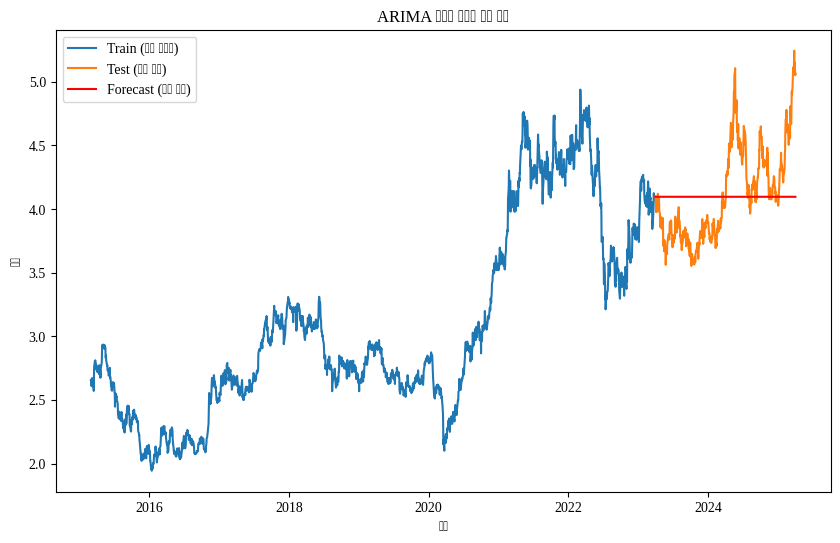

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 및 전처리
df = pd.read_csv('구리 선물 과거 데이터2.csv', parse_dates=['날짜'], index_col="날짜")
df = df.sort_index()  # 날짜 순서대로 정렬
closing_prices = df['종가']

# 훈련과 테스트 세트 분할 (80%, 20%)
split_index = int(len(closing_prices) * 0.8)
train = closing_prices.iloc[:split_index]
test = closing_prices.iloc[split_index:]

# ARIMA 모델 구성 및 학습
# order=(p, d, q)에서 d=1로 차분을 수행해 비정상성을 제거하고, p와 q는 예제로 (1,1) 사용
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# 테스트 기간에 대한 예측 (예측 스텝 수는 테스트 세트 길이와 동일)
forecast = model_fit.forecast(steps=len(test))

# 예측 성능 평가 (평균 제곱 오차)
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)

# 실제 종가와 예측 종가 시각화
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train (훈련 데이터)')
plt.plot(test.index, test, label='Test (실제 종가)')
plt.plot(test.index, forecast, label='Forecast (예측 종가)', color='red')
plt.title("ARIMA 모델을 활용한 종가 예측")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

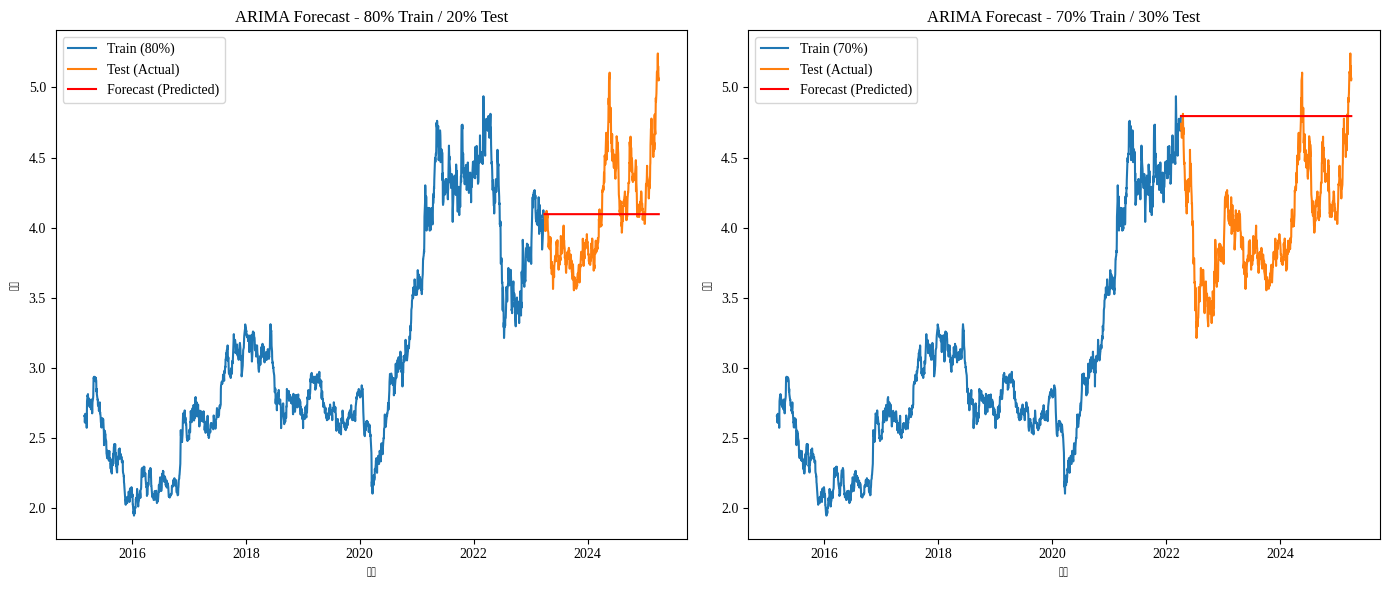

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 및 전처리
df = pd.read_csv('구리 선물 과거 데이터2.csv', parse_dates=['날짜'], index_col='날짜')
df = df.sort_index()  # 날짜 순서대로 정렬
closing_prices = df['종가']

# ---------------------------
# 80% Train / 20% Test Split
# ---------------------------
split_index_80 = int(len(closing_prices) * 0.8)
train_80 = closing_prices.iloc[:split_index_80]
test_80 = closing_prices.iloc[split_index_80:]

# ARIMA 모델 구성 및 학습 (order=(1,1,1))
model_80 = ARIMA(train_80, order=(1, 1, 1))
model_fit_80 = model_80.fit()

# 테스트 기간에 대한 예측 (테스트 세트 길이만큼 예측)
forecast_80 = model_fit_80.forecast(steps=len(test_80))

# 예측 성능 평가 (평균 제곱 오차)
mse_80 = mean_squared_error(test_80, forecast_80)

# ---------------------------
# 70% Train / 30% Test Split
# ---------------------------
split_index_70 = int(len(closing_prices) * 0.7)
train_70 = closing_prices.iloc[:split_index_70]
test_70 = closing_prices.iloc[split_index_70:]

# ARIMA 모델 구성 및 학습 (order=(1,1,1))
model_70 = ARIMA(train_70, order=(1, 1, 1))
model_fit_70 = model_70.fit()

# 테스트 기간에 대한 예측 (테스트 세트 길이만큼 예측)
forecast_70 = model_fit_70.forecast(steps=len(test_70))

# 예측 성능 평가 (평균 제곱 오차)
mse_70 = mean_squared_error(test_70, forecast_70)

# -----------------------------------------
# 두 가지 분할 결과를 1행 2열 subplot으로 출력
# -----------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 왼쪽 subplot: 80% Train / 20% Test 결과
axes[0].plot(train_80.index, train_80, label='Train (80%)')
axes[0].plot(test_80.index, test_80, label='Test (Actual)')
axes[0].plot(test_80.index, forecast_80, label='Forecast (Predicted)', color='red')
axes[0].set_title('ARIMA Forecast - 80% Train / 20% Test')
axes[0].set_xlabel('날짜')
axes[0].set_ylabel('종가')
axes[0].legend()

# 오른쪽 subplot: 70% Train / 30% Test 결과
axes[1].plot(train_70.index, train_70, label='Train (70%)')
axes[1].plot(test_70.index, test_70, label='Test (Actual)')
axes[1].plot(test_70.index, forecast_70, label='Forecast (Predicted)', color='red')
axes[1].set_title('ARIMA Forecast - 70% Train / 30% Test')
axes[1].set_xlabel('날짜')
axes[1].set_ylabel('종가')
axes[1].legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

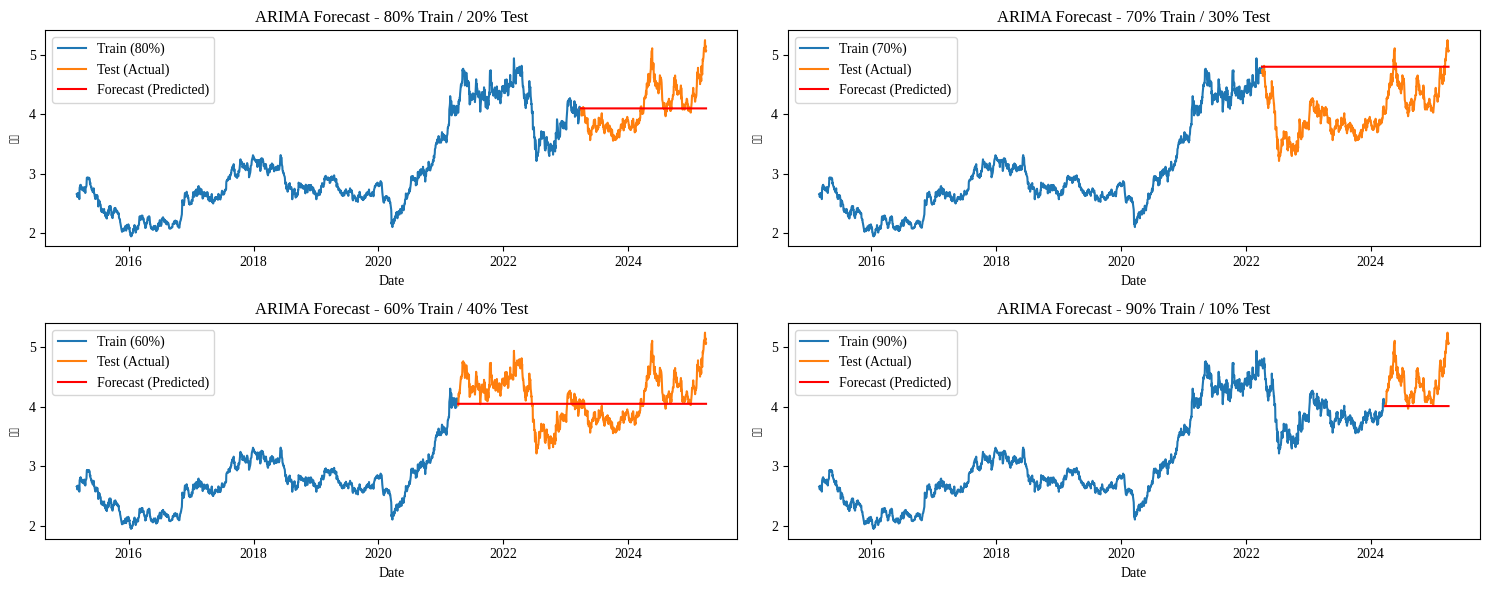

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 및 전처리
df = pd.read_csv('구리 선물 과거 데이터2.csv', parse_dates=['날짜'], index_col='날짜')
df = df.sort_index()  # 날짜 순서대로 정렬
closing_prices = df['종가']

# ---------------------------
# 80% Train / 20% Test Split
# ---------------------------
split_index_80 = int(len(closing_prices) * 0.8)
train_80 = closing_prices.iloc[:split_index_80]
test_80 = closing_prices.iloc[split_index_80:]
model_80 = ARIMA(train_80, order=(1, 1, 1))
model_fit_80 = model_80.fit()
forecast_80 = model_fit_80.forecast(steps=len(test_80))
mse_80 = mean_squared_error(test_80, forecast_80)

# ---------------------------
# 70% Train / 30% Test Split
# ---------------------------
split_index_70 = int(len(closing_prices) * 0.7)
train_70 = closing_prices.iloc[:split_index_70]
test_70 = closing_prices.iloc[split_index_70:]
model_70 = ARIMA(train_70, order=(1, 1, 1))
model_fit_70 = model_70.fit()
forecast_70 = model_fit_70.forecast(steps=len(test_70))
mse_70 = mean_squared_error(test_70, forecast_70)

# ---------------------------
# 60% Train / 40% Test Split
# ---------------------------
split_index_60 = int(len(closing_prices) * 0.6)
train_60 = closing_prices.iloc[:split_index_60]
test_60 = closing_prices.iloc[split_index_60:]
model_60 = ARIMA(train_60, order=(1, 1, 1))
model_fit_60 = model_60.fit()
forecast_60 = model_fit_60.forecast(steps=len(test_60))
mse_60 = mean_squared_error(test_60, forecast_60)

# ---------------------------
# 90% Train / 10% Test Split
# ---------------------------
split_index_90 = int(len(closing_prices) * 0.9)
train_90 = closing_prices.iloc[:split_index_90]
test_90 = closing_prices.iloc[split_index_90:]
model_90 = ARIMA(train_90, order=(1, 1, 1))
model_fit_90 = model_90.fit()
forecast_90 = model_fit_90.forecast(steps=len(test_90))
mse_90 = mean_squared_error(test_90, forecast_90)

# -----------------------------------------
# 네 가지 분할 결과를 2행 2열 subplot으로 출력
# -----------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15,6))

# 80/20 결과
axes[0, 0].plot(train_80.index, train_80, label='Train (80%)')
axes[0, 0].plot(test_80.index, test_80, label='Test (Actual)')
axes[0, 0].plot(test_80.index, forecast_80, label='Forecast (Predicted)', color='red')
axes[0, 0].set_title('ARIMA Forecast - 80% Train / 20% Test')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('종가')
axes[0, 0].legend()

# 70/30 결과
axes[0, 1].plot(train_70.index, train_70, label='Train (70%)')
axes[0, 1].plot(test_70.index, test_70, label='Test (Actual)')
axes[0, 1].plot(test_70.index, forecast_70, label='Forecast (Predicted)', color='red')
axes[0, 1].set_title('ARIMA Forecast - 70% Train / 30% Test')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('종가')
axes[0, 1].legend()

# 60/40 결과
axes[1, 0].plot(train_60.index, train_60, label='Train (60%)')
axes[1, 0].plot(test_60.index, test_60, label='Test (Actual)')
axes[1, 0].plot(test_60.index, forecast_60, label='Forecast (Predicted)', color='red')
axes[1, 0].set_title('ARIMA Forecast - 60% Train / 40% Test')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('종가')
axes[1, 0].legend()

# 90/10 결과
axes[1, 1].plot(train_90.index, train_90, label='Train (90%)')
axes[1, 1].plot(test_90.index, test_90, label='Test (Actual)')
axes[1, 1].plot(test_90.index, forecast_90, label='Forecast (Predicted)', color='red')
axes[1, 1].set_title('ARIMA Forecast - 90% Train / 10% Test')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('종가')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

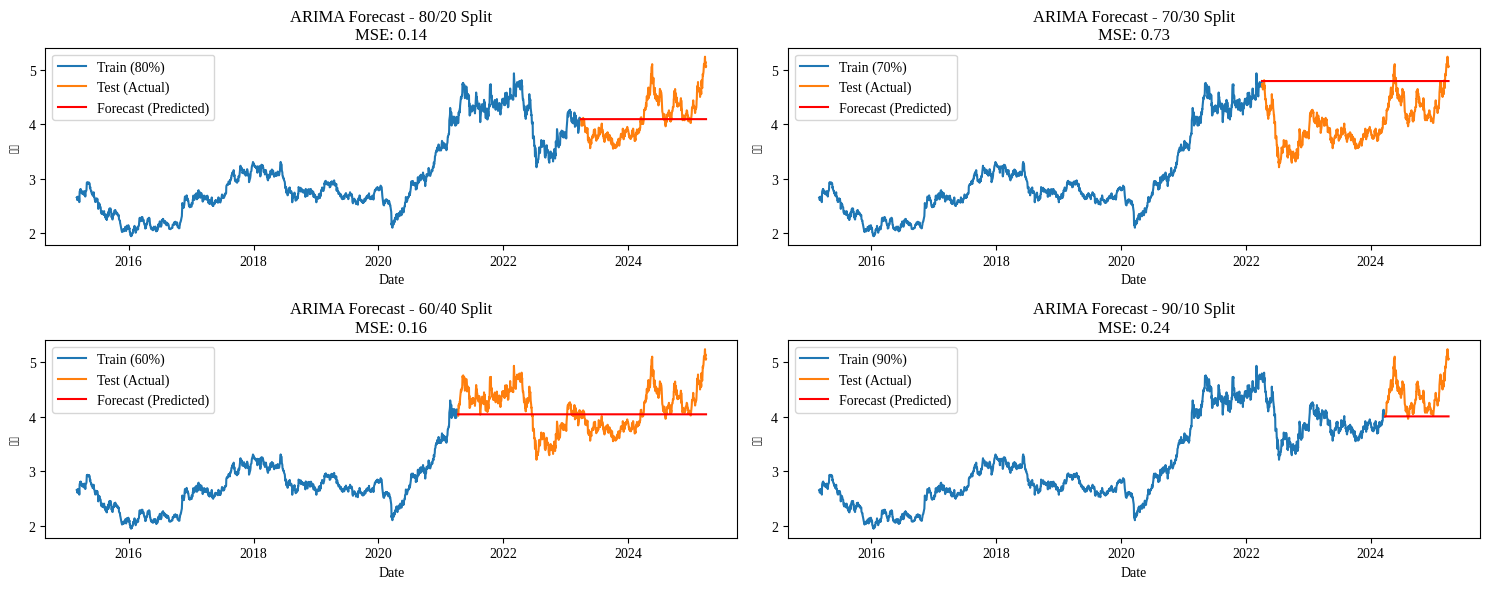

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 및 전처리
df = pd.read_csv('구리 선물 과거 데이터2.csv', parse_dates=['날짜'], index_col='날짜')
df = df.sort_index()
closing_prices = df['종가']

# ARIMA 모델 평가를 위한 함수 정의
def evaluate_arima(train, test, order=(1, 1, 1)):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test, forecast)
    return forecast, mse, model_fit

# 분할 비율과 subplot 설정
splits = {
    '80/20': 0.8,
    '70/30': 0.7,
    '60/40': 0.6,
    '90/10': 0.9,
}

fig, axes = plt.subplots(2, 2, figsize=(15, 6))
axes = axes.flatten()

results = {}  # 각 분할별 평가 결과 저장

# 각 train/test 분할에 대해 모델 평가 및 그래프 출력
for ax, (label, train_ratio) in zip(axes, splits.items()):
    split_index = int(len(closing_prices) * train_ratio)
    train = closing_prices.iloc[:split_index]
    test = closing_prices.iloc[split_index:]

    # ARIMA 모델 평가
    forecast, mse, model_fit = evaluate_arima(train, test, order=(1, 1, 1))
    results[label] = {'mse': mse, 'forecast': forecast}

    ax.plot(train.index, train, label=f'Train ({label.split("/")[0]}%)')
    ax.plot(test.index, test, label='Test (Actual)')
    ax.plot(test.index, forecast, label='Forecast (Predicted)', color='red')
    ax.set_title(f'ARIMA Forecast - {label} Split\nMSE: {mse:.2f}')
    ax.set_xlabel('Date')
    ax.set_ylabel('종가')
    ax.legend()

plt.tight_layout()
plt.show()


In [74]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 및 전처리
df = pd.read_csv('구리 선물 과거 데이터2.csv', parse_dates=['날짜'], index_col='날짜')
df = df.sort_index()
closing_prices = df['종가']

# ARIMA 모델 평가 함수 (하이퍼파라미터에 따른 MSE 반환)
def evaluate_arima_model(train, test, order):
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, forecast)
        return mse
    except Exception as e:
        # 모델 학습 중 에러가 발생하면 매우 큰 값 반환
        return np.inf

# 하이퍼파라미터 탐색 범위 설정 (예: p, d, q 각각 0 ~ 2)
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# 데이터 분할 (예: 80% Train / 20% Test)
split_index = int(len(closing_prices) * 0.8)
train = closing_prices.iloc[:split_index]
test = closing_prices.iloc[split_index:]

best_score, best_order = float("inf"), None

# 그리드 서치: 모든 (p, d, q) 조합에 대해 모델 평가
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            mse = evaluate_arima_model(train, test, order)
            print(f"ARIMA{order} MSE={mse:.3f}")
            if mse < best_score:
                best_score, best_order = mse, order

print(f"최적의 ARIMA order: {best_order} (MSE={best_score:.3f})")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA(0, 0, 0) MSE=1.200


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(0, 0, 1) MSE=1.198


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(0, 0, 2) MSE=1.197


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dis

ARIMA(0, 1, 0) MSE=0.137


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(0, 1, 1) MSE=0.137


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(0, 1, 2) MSE=0.137
ARIMA(0, 2, 0) MSE=6.776


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA(0, 2, 1) MSE=0.119


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dis

ARIMA(0, 2, 2) MSE=0.119


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(1, 0, 0) MSE=0.345


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(1, 0, 1) MSE=0.340


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(1, 0, 2) MSE=0.316
ARIMA(1, 1, 0) MSE=0.137


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(1, 1, 1) MSE=0.137


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(1, 1, 2) MSE=0.137


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dis

ARIMA(1, 2, 0) MSE=3.325


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(1, 2, 1) MSE=0.119


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(1, 2, 2) MSE=0.127


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dis

ARIMA(2, 0, 0) MSE=0.339


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(2, 0, 1) MSE=0.368


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(2, 0, 2) MSE=0.146


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(2, 1, 0) MSE=0.137


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(2, 1, 1) MSE=0.137


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(2, 1, 2) MSE=0.137


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

ARIMA(2, 2, 0) MSE=2.941


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dis

ARIMA(2, 2, 1) MSE=0.119
ARIMA(2, 2, 2) MSE=0.124
최적의 ARIMA order: (2, 2, 1) (MSE=0.119)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/di

                               SARIMAX Results                                
Dep. Variable:                     종가   No. Observations:                 2096
Model:                 ARIMA(2, 2, 1)   Log Likelihood                3522.293
Date:                Tue, 01 Apr 2025   AIC                          -7036.586
Time:                        05:46:36   BIC                          -7013.999
Sample:                             0   HQIC                         -7028.312
                               - 2096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0105      0.017     -0.603      0.547      -0.045       0.024
ar.L2         -0.0462      0.016     -2.901      0.004      -0.077      -0.015
ma.L1         -0.9999      0.013    -76.808      0.0

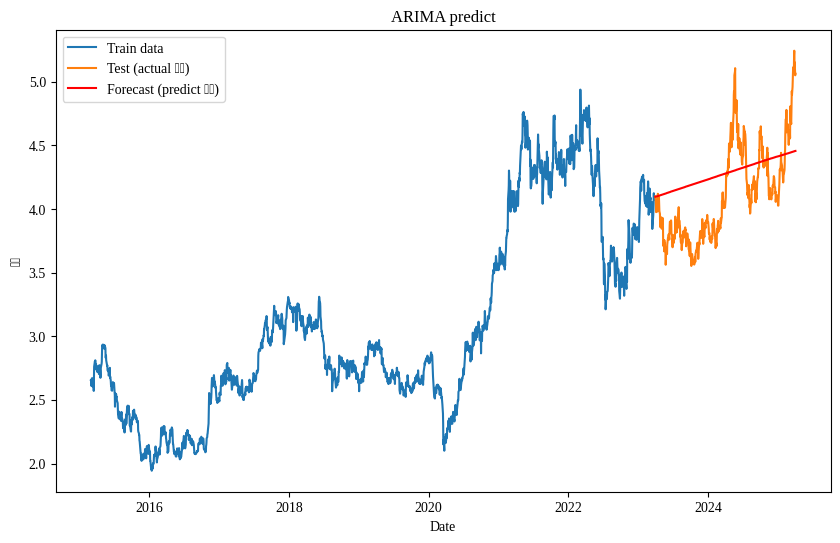

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 및 전처리
df = pd.read_csv('구리 선물 과거 데이터2.csv', parse_dates=['날짜'], index_col="날짜")
df = df.sort_index()  # 날짜 순서대로 정렬
closing_prices = df['종가']

# 훈련과 테스트 세트 분할 (80%, 20%)
split_index = int(len(closing_prices) * 0.8)
train = closing_prices.iloc[:split_index]
test = closing_prices.iloc[split_index:]

# ARIMA 모델 구성 및 학습
model = ARIMA(train, order=(2, 2, 1))
model_fit = model.fit()
print(model_fit.summary())

# 테스트 기간에 대한 예측 (예측 스텝 수는 테스트 세트 길이와 동일)
forecast = model_fit.forecast(steps=len(test))

# 예측 성능 평가 (평균 제곱 오차)
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)

# 실제 종가와 예측 종가 시각화
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train data')
plt.plot(test.index, test, label='Test (actual 종가)')
plt.plot(test.index, forecast, label='Forecast (predict 종가)', color='red')
plt.title("ARIMA predict")
plt.xlabel("Date")
plt.ylabel("종가")
plt.legend()
plt.show()
